In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [2]:
# Define path components
#folder = 'Resources'
#filename = 'health_data_tobacco.csv'

# Construct full path
csv_path = os.path.join('Resources', 'health_data_tobacco.csv' )

# Read the CSV file
tobacco_df = pd.read_csv(csv_path, low_memory=False)

In [3]:
# Show the first few rows of the data
tobacco_df.head()

YearStart  YearEnd LocationAbbr   LocationDesc DataSource    Topic  \
0       2019     2019           US  United States      STATE  Tobacco   
1       2020     2020           MI       Michigan      STATE  Tobacco   
2       2014     2014           AK         Alaska      STATE  Tobacco   
3       2018     2018           ME          Maine      STATE  Tobacco   
4       2017     2017           WY        Wyoming      STATE  Tobacco   

                                            Question  Response  \
0                            Sale of cigarette packs       NaN   
1  States that allow stronger local tobacco contr...       NaN   
2                            Sale of cigarette packs       NaN   
3               Amount of tobacco product excise tax       NaN   
4                            Sale of cigarette packs       NaN   

           DataValueUnit DataValueType  ... LocationID  TopicID QuestionID  \
0  pack sales per capita        Number  ...         59      TOB    TOB10_0   
1                    NaN        Yes/No  ...         26      TOB     TOB4_0   
2  pack sales per capita        Number  ...          2      TOB    TOB10_0   
3                    NaN        Yes/No  ...         23      TOB     TOB7_0   
4  pack sales per capita        Number  ...         56      TOB    TOB10_0   

  DataValueTypeID  StratificationCategoryID1  StratificationID1  \
0            NMBR                    OVERALL                OVR   
1           YESNO                    OVERALL                OVR   
2            NMBR                    OVERALL                OVR   
3           YESNO                    OVERALL                OVR   
4            NMBR                    OVERALL                OVR   

  StratificationCategoryID2 StratificationID2  StratificationCategoryID3  \
0                       NaN               NaN                        NaN   
1                       NaN               NaN                        NaN   
2                       NaN               NaN                        NaN   
3                       NaN               NaN                        NaN   
4                       NaN               NaN                        NaN   

   StratificationID3  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 34 columns]

In [4]:
# Filter the data for 'Tobacco' in the 'Topic' column
tobacco_data = tobacco_df[tobacco_df['Topic'] == 'Tobacco']

# Convert the 'DataValue' column to numeric, coercing non-numeric values to NaN
tobacco_data['DataValue'] = pd.to_numeric(tobacco_data['DataValue'], errors='coerce')

# Drop rows where 'DataValue' is NaN (this will remove non-numeric values)
tobacco_data_clean = tobacco_data.dropna(subset=['DataValue'])

# Group by 'LocationDesc' and sum the 'DataValue' column
tobacco_by_state = tobacco_data_clean.groupby('LocationDesc')['DataValue'].sum().reset_index()

# Sort the result by 'DataValue' in descending order
tobacco_by_state_sorted = tobacco_by_state.sort_values(by='DataValue', ascending=False)

# Display the sorted result
print(tobacco_by_state_sorted)

            LocationDesc  DataValue
37              Oklahoma   27112.60
28              Nebraska   25962.30
17                Kansas   25095.00
23              Michigan   25026.10
24             Minnesota   24929.30
51            Washington   24658.60
33              New York   24237.30
18              Kentucky   23866.60
26              Missouri   23341.20
22         Massachusetts   23270.00
36                  Ohio   23257.00
42        South Carolina   23000.60
27               Montana   22890.90
32            New Mexico   22822.10
21              Maryland   22782.70
39          Pennsylvania   22574.20
5               Colorado   22151.60
15               Indiana   22151.30
45                 Texas   22135.80
34        North Carolina   21960.00
0                Alabama   21820.50
3               Arkansas   21778.40
12                Hawaii   21764.20
43          South Dakota   21497.10
53             Wisconsin   21481.50
25           Mississippi   21428.30
52         West Virginia   2

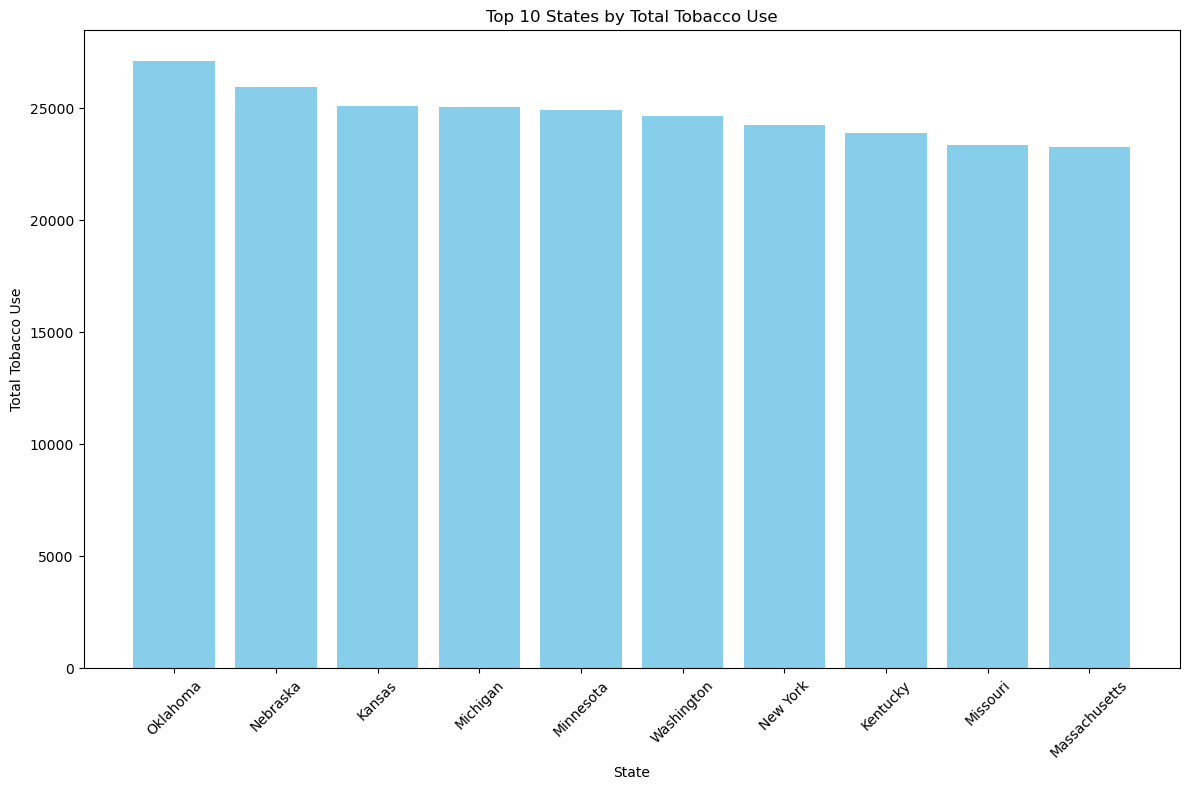

In [5]:
# Plot the data as a bar plot
plt.figure(figsize=(12, 8))  # Set the figure size

# Create a bar plot (for the top 10 states for example)
plt.bar(tobacco_by_state_sorted['LocationDesc'][:10], tobacco_by_state_sorted['DataValue'][:10], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Tobacco Use')
plt.title('Top 10 States by Total Tobacco Use')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

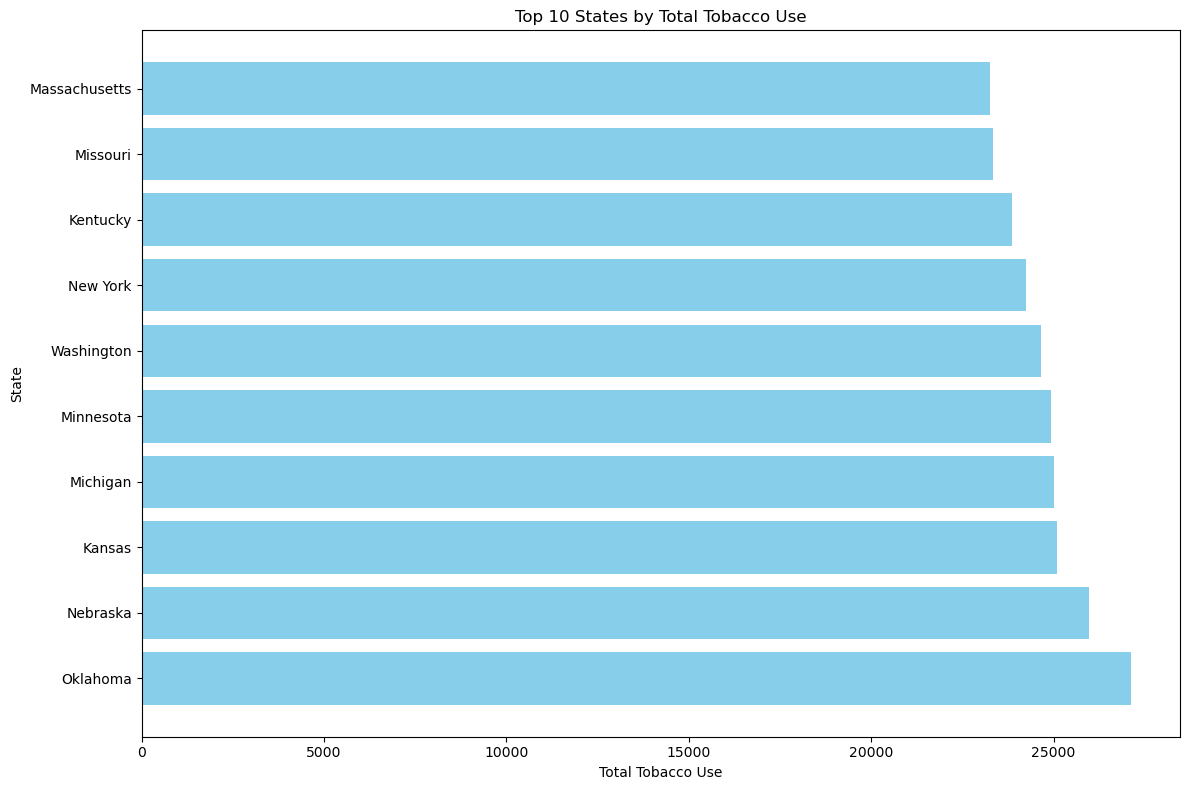

In [6]:
# Horizontal bar plot
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot (for the top 10 states for example)
plt.barh(tobacco_by_state_sorted['LocationDesc'][:10], tobacco_by_state_sorted['DataValue'][:10], color='skyblue')

# Add labels and title
plt.ylabel('State')
plt.xlabel('Total Tobacco Use')
plt.title('Top 10 States by Total Tobacco Use')

# Show the plot
plt.tight_layout()
plt.show()

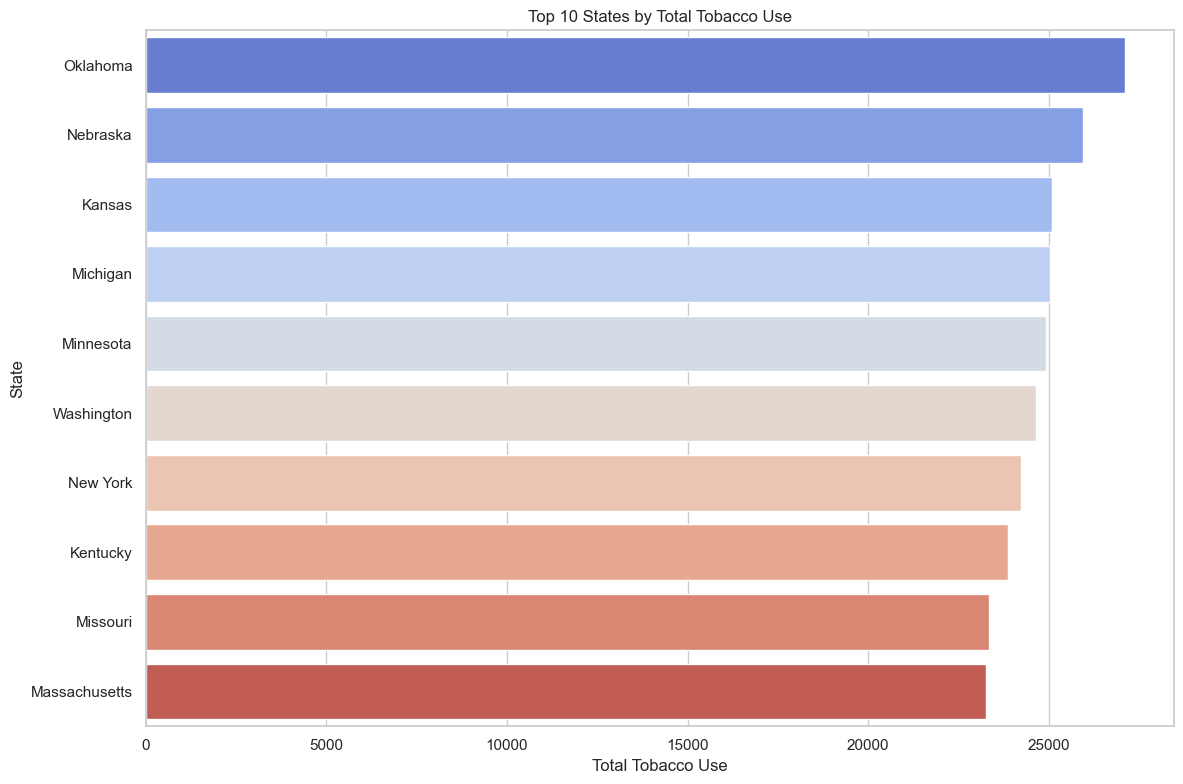

In [7]:
# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot (for the top 10 states for example)
plt.figure(figsize=(12, 8))
sns.barplot(x='DataValue', y='LocationDesc', data=tobacco_by_state_sorted.head(10), palette='coolwarm')

# Add labels and title
plt.xlabel('Total Tobacco Use')
plt.ylabel('State')
plt.title('Top 10 States by Total Tobacco Use')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
plt.savefig('tobacco_use_by_state.png')
plt.show()

<Figure size 640x480 with 0 Axes>

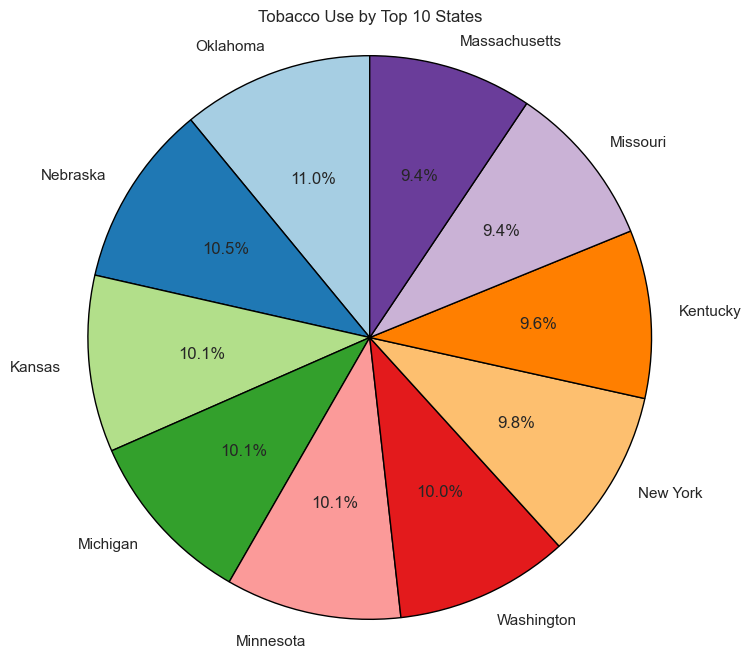

In [9]:
# Data preparation (for the top 10 states, or you can choose all if desired)
top_10_states = tobacco_by_state_sorted.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Pie chart creation
plt.pie(top_10_states['DataValue'], 
        labels=top_10_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors[:10],  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'}) # Add edge color to wedges

# Add title
plt.title('Tobacco Use by Top 10 States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

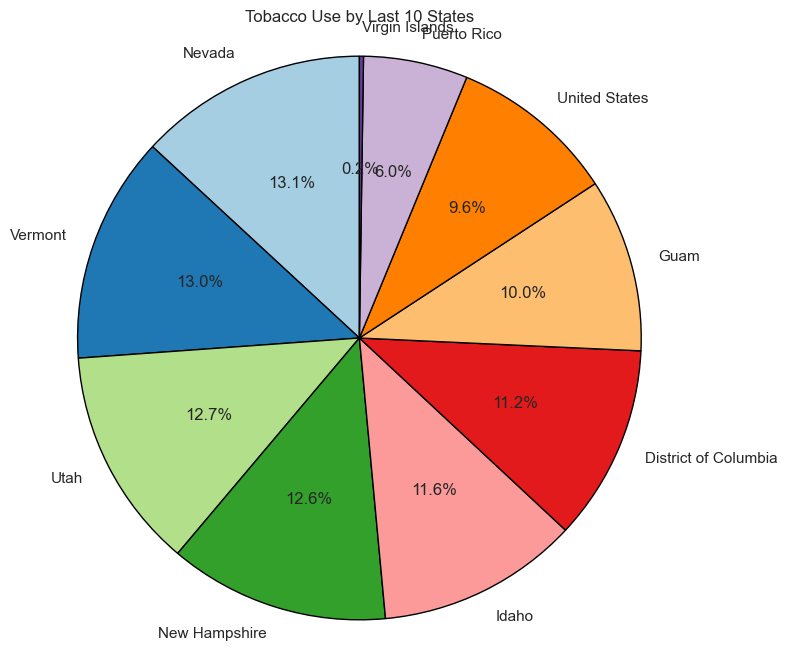

In [10]:
# Data preparation (for the last 10 states)
last_10_states = tobacco_by_state_sorted.tail(10)  # Use tail() to get the last 10 states

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Pie chart creation
plt.pie(last_10_states['DataValue'], 
        labels=last_10_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors[:10],  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'}) # Add edge color to wedges

# Add title
plt.title('Tobacco Use by Last 10 States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

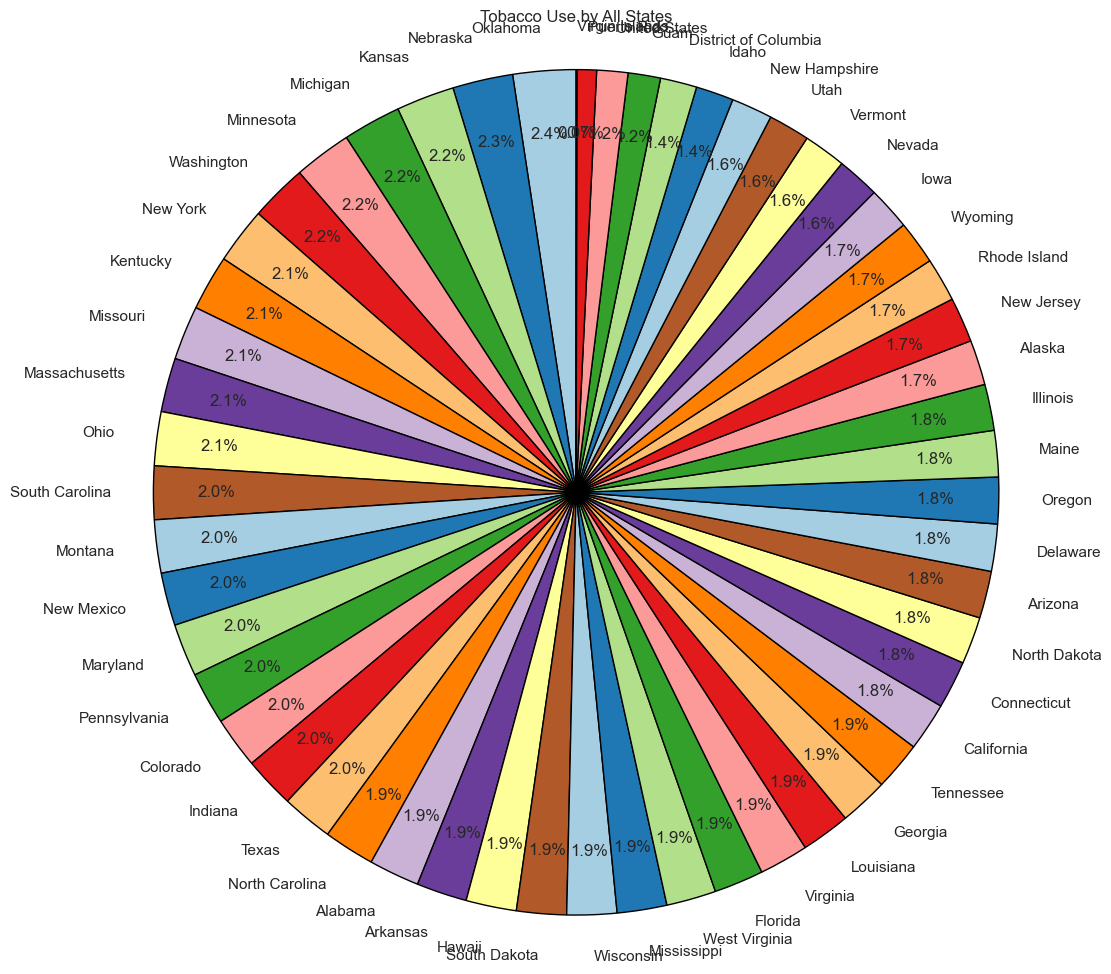

In [11]:
# Data preparation (for all states)
all_states = tobacco_by_state_sorted  # Use the entire sorted DataFrame

# Create a pie chart
plt.figure(figsize=(12, 12))  # Set the figure size to accommodate all states

# Pie chart creation
plt.pie(all_states['DataValue'], 
        labels=all_states['LocationDesc'], 
        autopct='%1.1f%%',  # Display percentage
        startangle=90,      # Start the pie chart at 90 degrees
        colors=plt.cm.Paired.colors,  # Choose colors from a colormap
        wedgeprops={'edgecolor': 'black'},  # Add edge color to wedges
        pctdistance=0.85)  # Adjust distance of percentage text

# Add title
plt.title('Tobacco Use by All States')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

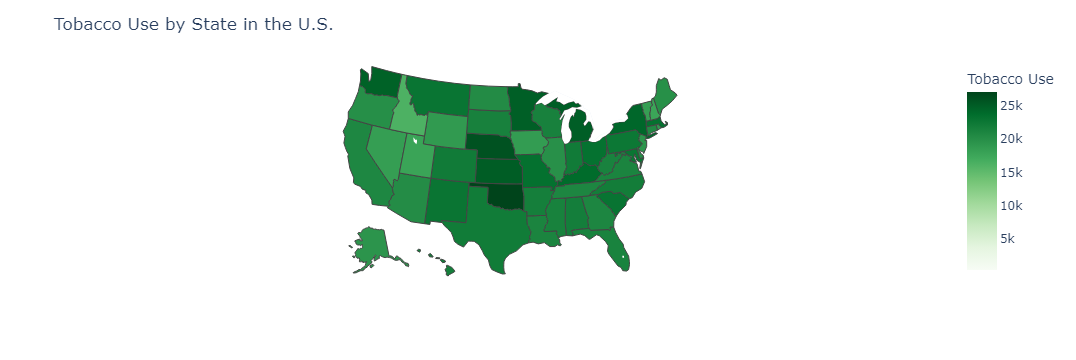

In [12]:
import plotly.express as px

# Dictionary to map state names to abbreviations
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map full state names to abbreviations in your DataFrame
tobacco_by_state_sorted['StateAbbrev'] = tobacco_by_state_sorted['LocationDesc'].map(state_abbrev)

# Create a choropleth map using the state abbreviations
fig = px.choropleth(tobacco_by_state_sorted, 
                    locations='StateAbbrev',  # Use the new column with state abbreviations
                    locationmode='USA-states',  # Match state abbreviations
                    color='DataValue',  # Data to color code by
                    hover_name='LocationDesc',  # Info on hover
                    color_continuous_scale='Greens',  # Color scale
                    scope='usa',  # Limit map to USA
                    labels={'DataValue':'Tobacco Use'}  # Label for color bar
                   )

# Add title
fig.update_layout(title_text='Tobacco Use by State in the U.S.', geo_scope='usa')

# Show the figure
fig.show()

In [13]:
# Ensure DataValue column is numeric (convert any non-numeric values to NaN)
tobacco_df['DataValue'] = pd.to_numeric(tobacco_df['DataValue'], errors='coerce')

# Filter only the relevant questions
questions_of_interest = [
    'Current cigarette smoking among youth',
    'Current smokeless tobacco use among youth',
    'Current smoking before pregnancy',
    'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke',
    'Current smokeless tobacco use among adults aged >= 18 years',
    'Current smoking among adults aged >= 18 years',
    'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke',
    'Current cigarette smoking among women aged 18-44 years',
    'Current smokeless tobacco use among women aged >= 18 years',
    'Quit attempts in the past year among current smokers'
]

# Filter the dataframe to include only rows with these questions
filtered_df = tobacco_df[(tobacco_df['Question'].isin(questions_of_interest)) ]


# Group by Question and LocationDesc (state) and get the DataValue for each
grouped_data = filtered_df.groupby(['Question', 'LocationDesc'])['DataValue'].mean().unstack()

# Display the result
grouped_data

LocationDesc                                          Alabama     Alaska  \
Question                                                                   
Current cigarette smoking among women aged 18-4...  22.023529  22.932432   
Current cigarette smoking among youth               12.018750  10.530769   
Current smokeless tobacco use among adults aged...   5.756140   6.793805   
Current smokeless tobacco use among youth            9.912500   9.920000   
Current smoking among adults aged >= 18 years       22.867702  21.946000   
Pneumococcal vaccination among noninstitutional...  24.557273  25.172727   
Pneumococcal vaccination among noninstitutional...  64.398889  56.321154   
Quit attempts in the past year among current sm...  64.933654  59.920755   

LocationDesc                                          Arizona   Arkansas  \
Question                                                                   
Current cigarette smoking among women aged 18-4...  13.628125  27.172414   
Current cigarette smoking among youth                9.363636  13.033333   
Current smokeless tobacco use among adults aged...   3.081600   6.769307   
Current smokeless tobacco use among youth            3.700000   9.792857   
Current smoking among adults aged >= 18 years       16.362353  25.083636   
Pneumococcal vaccination among noninstitutional...  26.900000  25.574257   
Pneumococcal vaccination among noninstitutional...  63.431395  65.327273   
Quit attempts in the past year among current sm...  60.117355  61.151000   

LocationDesc                                        California   Colorado  \
Question                                                                    
Current cigarette smoking among women aged 18-4...   10.891304  16.282500   
Current cigarette smoking among youth                 5.892308   6.130000   
Current smokeless tobacco use among adults aged...    1.817647   3.862963   
Current smokeless tobacco use among youth             3.942857        NaN   
Current smoking among adults aged >= 18 years        12.256000  16.992045   
Pneumococcal vaccination among noninstitutional...   25.304478  25.681818   
Pneumococcal vaccination among noninstitutional...   60.671951  68.310227   
Quit attempts in the past year among current sm...   61.722222  62.701587   

LocationDesc                                        Connecticut   Delaware  \
Question                                                                     
Current cigarette smoking among women aged 18-4...    14.030952  19.877419   
Current cigarette smoking among youth                  8.153846   9.673684   
Current smokeless tobacco use among adults aged...     1.687629   2.645122   
Current smokeless tobacco use among youth              2.483333   3.987500   
Current smoking among adults aged >= 18 years         15.108046  18.219255   
Pneumococcal vaccination among noninstitutional...    23.656911  25.618868   
Pneumococcal vaccination among noninstitutional...    61.288372  66.537143   
Quit attempts in the past year among current sm...    66.557500  61.674576   

LocationDesc                                        District of Columbia  \
Question                                                                   
Current cigarette smoking among women aged 18-4...             15.912000   
Current cigarette smoking among youth                           5.485714   
Current smokeless tobacco use among adults aged...              1.309459   
Current smokeless tobacco use among youth                       4.600000   
Current smoking among adults aged >= 18 years                  15.929861   
Pneumococcal vaccination among noninstitutional...             28.241837   
Pneumococcal vaccination among noninstitutional...             53.398214   
Quit attempts in the past year among current sm...             66.467000   

LocationDesc                                          Florida  ...      Texas  \
Question                                                       ...              
Cur

In [14]:
# Ensure DataValue column is numeric (convert any non-numeric values to NaN)
tobacco_df['DataValue'] = pd.to_numeric(tobacco_df['DataValue'], errors='coerce')

# Filter only the relevant questions
questions_of_interest = [
    'Current cigarette smoking among youth',
    'Current smokeless tobacco use among youth',
    'Current smoking before pregnancy',
    'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years who smoke',
    'Current smokeless tobacco use among adults aged >= 18 years',
    'Current smoking among adults aged >= 18 years',
    'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years who smoke',
    'Current cigarette smoking among women aged 18-44 years',
    'Current smokeless tobacco use among women aged >= 18 years',
    'Quit attempts in the past year among current smokers'
]

# Filter the dataframe to include only rows with these questions
filtered_df = tobacco_df[(tobacco_df['Question'].isin(questions_of_interest)) ]

# Drop unnecessary columns
dropped_df = filtered_df.drop(['Topic', 'DataSource', 'Response', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3', 'GeoLocation', 'ResponseID',
        'LocationID', 'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3'], axis=1)
# display(dropped_df)
dropped_df

YearStart  YearEnd LocationAbbr          LocationDesc  \
17          2015     2015           SD          South Dakota   
28          2017     2017           US         United States   
37          2019     2019           DC  District of Columbia   
38          2019     2019           WA            Washington   
41          2017     2017           PR           Puerto Rico   
...          ...      ...          ...                   ...   
59391       2013     2013           TN             Tennessee   
59392       2021     2021           TX                 Texas   
59393       2021     2021           TX                 Texas   
59394       2021     2021           TX                 Texas   
59395       2016     2016           TN             Tennessee   

                                                Question DataValueUnit  \
17                 Current cigarette smoking among youth             %   
28                 Current cigarette smoking among youth             %   
37             Current smokeless tobacco use among youth             %   
38                 Current cigarette smoking among youth             %   
41             Current smokeless tobacco use among youth             %   
...                                                  ...           ...   
59391      Current smoking among adults aged >= 18 years             %   
59392  Current cigarette smoking among women aged 18-...             %   
59393  Current smokeless tobacco use among adults age...             %   
59394  Pneumococcal vaccination among noninstitutiona...             %   
59395  Current cigarette smoking among women aged 18-...             %   

          DataValueType  DataValue StratificationCategory1  \
17     Crude Prevalence       10.5                  Gender   
28     Crude Prevalence        4.4          Race/Ethnicity   
37     Crude Prevalence        6.8                  Gender   
38     Crude Prevalence        NaN          Race/Ethnicity   
41     Crude Prevalence        NaN                 Overall   
...                 ...        ...                     ...   
59391  Crude Prevalence        NaN          Race/Ethnicity   
59392  Crude Prevalence        NaN          Race/Ethnicity   
59393  Crude Prevalence        5.1          Race/Ethnicity   
59394  Crude Prevalence        NaN          Race/Ethnicity   
59395  Crude Prevalence        NaN          Race/Ethnicity   

           Stratification1  
17                    Male  
28     Black, non-Hispanic  
37                    Male  
38     White, non-Hispanic  
41                 Overall  
...                    ...  
59391             Hispanic  
59392  Black, non-Hispanic  
59393  White, non-Hispanic  
59394  Other, non-Hispanic  
59395  Other, non-Hispanic  

[54175 rows x 10 columns]

In [15]:
overall_df = dropped_df.loc[(dropped_df["StratificationCategory1"] == "Overall") & (dropped_df["DataValueType"] == "Age-adjusted Prevalence")].drop(["LocationAbbr", "StratificationCategory1", "Stratification1"], axis=1)
overall_df

YearStart  YearEnd LocationDesc  \
7797        2017     2017       Alaska   
7811        2019     2019       Alaska   
7868        2015     2015       Alaska   
7879        2013     2013       Alaska   
7883        2012     2012       Alaska   
...          ...      ...          ...   
59345       2014     2014      Wyoming   
59365       2017     2017    Tennessee   
59371       2020     2020    Tennessee   
59373       2011     2011    Tennessee   
59383       2013     2013    Tennessee   

                                                Question DataValueUnit  \
7797   Current smokeless tobacco use among adults age...             %   
7811   Current smokeless tobacco use among adults age...             %   
7868   Current smokeless tobacco use among adults age...             %   
7879   Pneumococcal vaccination among noninstitutiona...             %   
7883   Quit attempts in the past year among current s...             %   
...                                                  ...           ...   
59345  Quit attempts in the past year among current s...             %   
59365  Pneumococcal vaccination among noninstitutiona...             %   
59371  Pneumococcal vaccination among noninstitutiona...             %   
59373  Pneumococcal vaccination among noninstitutiona...             %   
59383  Pneumococcal vaccination among noninstitutiona...             %   

                 DataValueType  DataValue  
7797   Age-adjusted Prevalence        6.7  
7811   Age-adjusted Prevalence        7.2  
7868   Age-adjusted Prevalence        6.4  
7879   Age-adjusted Prevalence       23.0  
7883   Age-adjusted Prevalence       63.3  
...                        ...        ...  
59345  Age-adjusted Prevalence       61.6  
59365  Age-adjusted Prevalence       28.0  
59371  Age-adjusted Prevalence       68.1  
59373  Age-adjusted Prevalence       22.2  
59383  Age-adjusted Prevalence       27.3  

[3025 rows x 7 columns]

In [16]:
# Get DataValue for a specific question, e.g., 'Current smokeless tobacco use among adults aged >= 18 years'
specific_question1 = 'Current smokeless tobacco use among adults aged >= 18 years'

# Filter the DataFrame for this specific question
tobacco_adult_df = overall_df.loc[overall_df['Question'] == specific_question1]

# Display the relevant columns: LocationDesc (State) and DataValue
result_df = tobacco_adult_df[['LocationDesc', 'DataValue']]

# Show the result
print(result_df)

      LocationDesc  DataValue
7797        Alaska        6.7
7811        Alaska        7.2
7868        Alaska        6.4
8081        Alaska        5.2
8323        Alaska        5.8
...            ...        ...
59131      Wyoming        8.5
59147      Wyoming        9.9
59173      Wyoming        9.2
59177      Wyoming        9.3
59292      Wyoming        9.5

[605 rows x 2 columns]


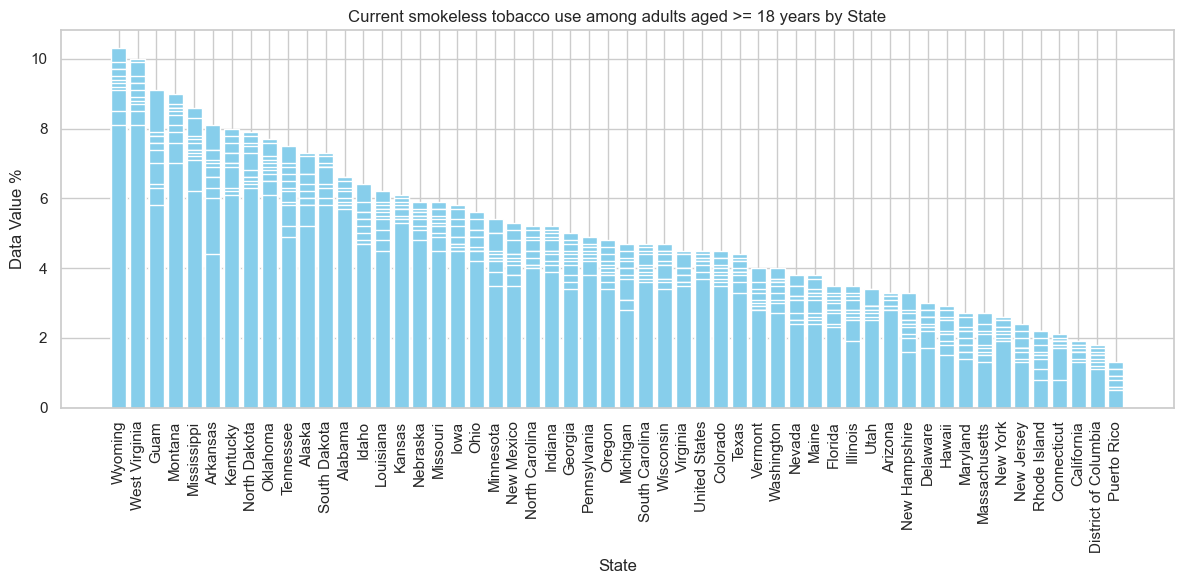

In [17]:
# Drop any NaN values (if any)
result_df = result_df.dropna()

# Sort the DataFrame by the 'DataValue' column in descending order
result_df = result_df.sort_values(by='DataValue', ascending=False)

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(result_df['LocationDesc'], result_df['DataValue'], color='skyblue')

# Add title and labels
plt.title('Current smokeless tobacco use among adults aged >= 18 years by State')
plt.xlabel('State')
plt.ylabel('Data Value %')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# Get DataValue for a specific question, e.g., 'Current smoking among adults aged >= 18 years'
specific_question2 = 'Current smoking among adults aged >= 18 years'

# Filter the DataFrame for this specific question
tobacco_adult2_df = overall_df.loc[overall_df['Question'] == specific_question2]

# Display the relevant columns: LocationDesc (State) and DataValue
result2_df = tobacco_adult2_df[['LocationDesc', 'DataValue']]

# Show the result
print(result2_df)

      LocationDesc  DataValue
8034        Alaska       18.7
8058        Alaska       20.0
8166        Alaska       18.7
8337        Alaska       19.5
8341        Alaska       17.6
...            ...        ...
58589      Wyoming       23.1
59022      Wyoming       19.3
59024      Wyoming       19.4
59324      Wyoming       18.9
59325      Wyoming       19.4

[605 rows x 2 columns]


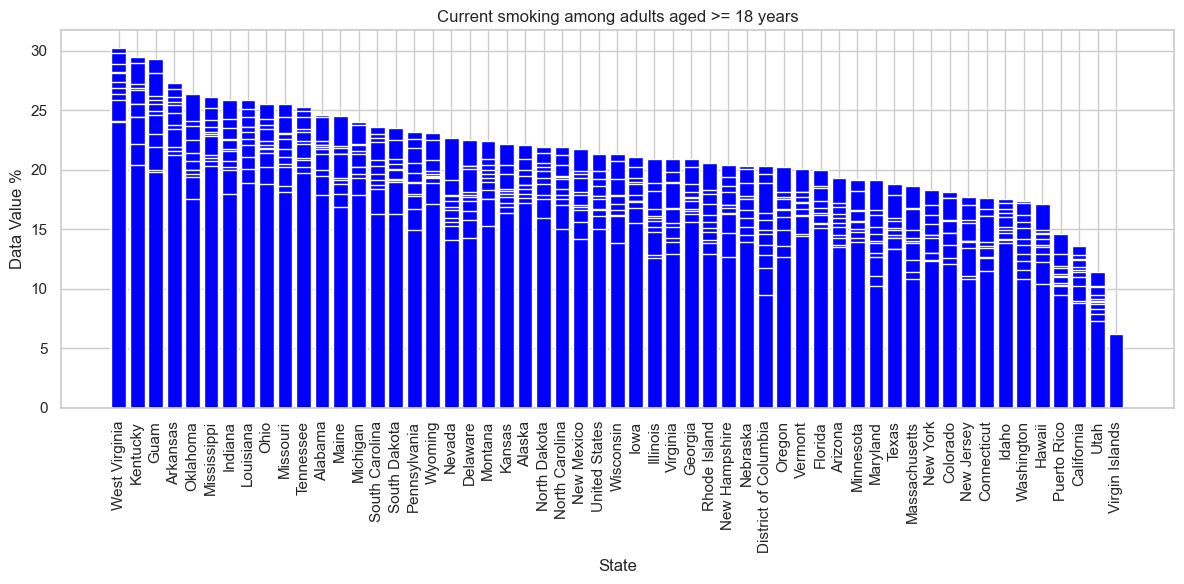

In [19]:
# Drop any NaN values (if any)
result2_df = result2_df.dropna()

# Sort the DataFrame by the 'DataValue' column in descending order
result2_df = result2_df.sort_values(by='DataValue', ascending=False)

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(result2_df['LocationDesc'], result2_df['DataValue'], color='blue')

# Add title and labels
plt.title('Current smoking among adults aged >= 18 years')
plt.xlabel('State')
plt.ylabel('Data Value %')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
# Get DataValue for a specific question, e.g., 'Current cigarette smoking among youth'
specific_question3 = 'Current cigarette smoking among youth'

# Filter the DataFrame for this specific question
tobacco_youth_df = overall_df.loc[overall_df['Question'] == specific_question3]

# Display the relevant columns: LocationDesc (State) and DataValue
result3_df = tobacco_youth_df[['LocationDesc', 'DataValue']]

# Show the result
print(result3_df)

Empty DataFrame
Columns: [LocationDesc, DataValue]
Index: []


In [21]:
# Get DataValue for a specific question, e.g., 'Current smokeless tobacco use among youth'
specific_question4 = 'Current smokeless tobacco use among youth'

# Filter the DataFrame for this specific question
tobacco_youth2_df = overall_df.loc[overall_df['Question'] == specific_question4]

# Display the relevant columns: LocationDesc (State) and DataValue
result4_df = tobacco_youth2_df[['LocationDesc', 'DataValue']]

# Show the result
print(result4_df)

Empty DataFrame
Columns: [LocationDesc, DataValue]
Index: []


In [22]:
# Get DataValue for a specific question, e.g., 'Current smoking before pregnancy'
specific_question5 = 'Current smoking before pregnancy'

# Filter the DataFrame for this specific question
pregnancy_df = overall_df.loc[overall_df['Question'] == specific_question5]

# Display the relevant columns: LocationDesc (State) and DataValue
result5_df = pregnancy_df[['LocationDesc', 'DataValue']]

# Show the result
print(result5_df)

Empty DataFrame
Columns: [LocationDesc, DataValue]
Index: []


In [23]:
# Get DataValue for a specific question, e.g., 'Current cigarette smoking among women aged 18-44 years'
specific_question6 = 'Current cigarette smoking among women aged 18-44 years'

# Filter the DataFrame for this specific question
women_df = overall_df.loc[overall_df['Question'] == specific_question6]

# Display the relevant columns: LocationDesc (State) and DataValue
result6_df = women_df[['LocationDesc', 'DataValue']]

# Show the result
print(result6_df)

Empty DataFrame
Columns: [LocationDesc, DataValue]
Index: []


In [25]:
# Get DataValue for a specific question, e.g., 'Current smokeless tobacco use among women aged >= 18 years'
specific_question7 = 'Current smokeless tobacco use among women aged >= 18 years'

# Filter the DataFrame for this specific question
smokeless_women_df = overall_df.loc[overall_df['Question'] == specific_question7]

# Display the relevant columns: LocationDesc (State) and DataValue
result7_df = smokeless_women_df[['LocationDesc', 'DataValue']]

# Show the result
print(result7_df)

Empty DataFrame
Columns: [LocationDesc, DataValue]
Index: []


In [26]:
# Get DataValue for a specific question, e.g., 'Quit attempts in the past year among current smokers'
specific_question8 = 'Quit attempts in the past year among current smokers'

# Filter the DataFrame for this specific question
quit_attempt_df = overall_df.loc[overall_df['Question'] == specific_question8]

# Display the relevant columns: LocationDesc (State) and DataValue
result8_df = quit_attempt_df[['LocationDesc', 'DataValue']]

# Show the result
print(result8_df)

      LocationDesc  DataValue
7883        Alaska       63.3
7979        Alaska       54.4
8004        Alaska       64.8
8110        Alaska       56.6
8307        Alaska        NaN
...            ...        ...
59116      Wyoming       62.1
59296      Wyoming       54.3
59308      Wyoming       49.9
59331      Wyoming       59.8
59345      Wyoming       61.6

[605 rows x 2 columns]


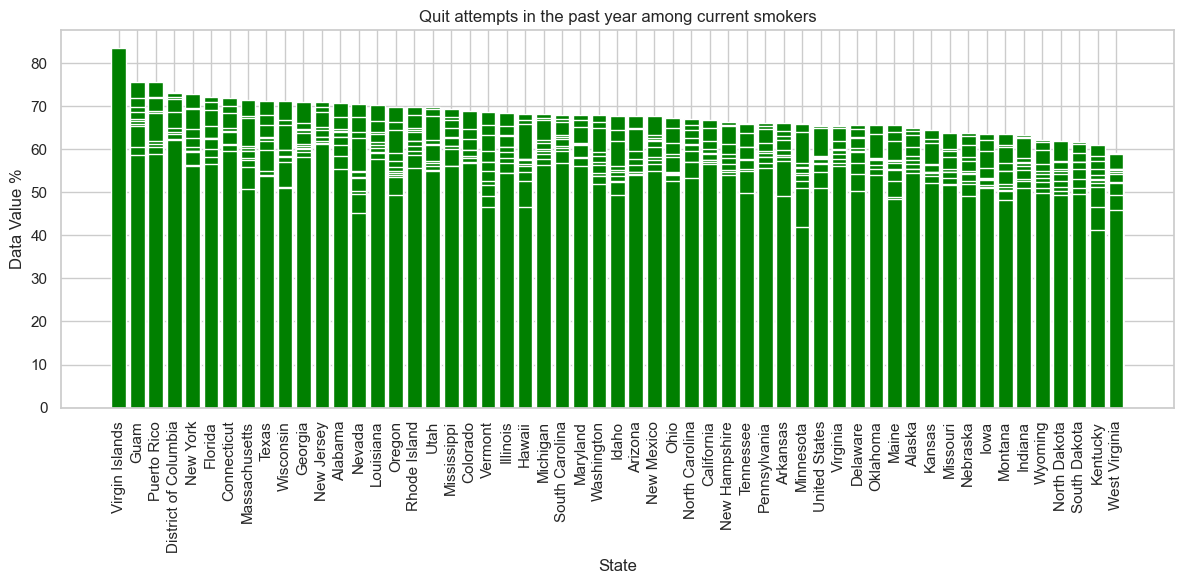

In [29]:
# Drop any NaN values (if any)
result8_df = result8_df.dropna()

# Sort the DataFrame by the 'DataValue' column in descending order
result8_df = result8_df.sort_values(by='DataValue', ascending=False)

# Plot the data as a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(result8_df['LocationDesc'], result8_df['DataValue'], color='green')

# Add title and labels
plt.title('Quit attempts in the past year among current smokers')
plt.xlabel('State')
plt.ylabel('Data Value %')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()